In [42]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

#Training (891 entries) and Testing (418 entries) data

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
all_data = [train_data, test_data]
passenger_id = test_data['PassengerId']

In [13]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train_data.shape

(891, 12)

In [14]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [54]:
test_data.shape

(418, 12)

In [21]:
train_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [23]:
test_data.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [25]:
#Feature 1: Pclass
#This shows 1st class passenger survived much more in percentage ratio as compare to the other Pclasses

print(train_data[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


3    491
1    216
2    184
Name: Pclass, dtype: int64


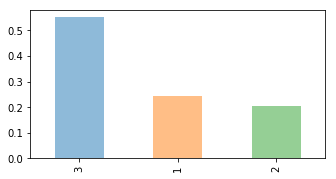

In [27]:
#Visualising the total percentage of Pclass

fig = plt.figure(figsize=(18,6))
plt.subplot2grid((2,3), (0,0))
total_pclasses = train_data.Pclass.value_counts()
print(total_pclasses) #there are total 491 passengers of 3rd Pclass, 216 of 1st Pclass, and 184 of 2nd Pclass

train_data.Pclass.value_counts(normalize=True).plot(kind='bar', alpha=0.5) #this plots the bar graph of all Pclasses


In [29]:
#Feature 2: Sex
#This shows the females survived much more as compare to the males by showing the survived percentage ratio

print(train_data[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


male      577
female    314
Name: Sex, dtype: int64


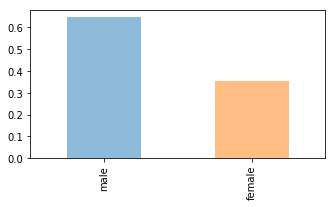

In [30]:
# Shows the total number of males and females in the train data set of the ship
fig = plt.figure(figsize=(18,6))
plt.subplot2grid((2,3), (0,0))
total_sex = train_data.Sex.value_counts()
print(total_sex) #this shows there are total 577 males and 314 females
train_data.Sex.value_counts(normalize=True).plot(kind='bar', alpha=0.5) #this plots the bar graph of total number of sex

In [32]:
#Feature 3: Family Size (contain SibSp, Parch and the passenger himself/herself)

for data in all_data:
    data['family_size'] = data['SibSp'] + data['Parch'] + 1
print(train_data[["family_size","Survived"]].groupby(["family_size"], as_index = False).mean())

   family_size  Survived
0            1  0.303538
1            2  0.552795
2            3  0.578431
3            4  0.724138
4            5  0.200000
5            6  0.136364
6            7  0.333333
7            8  0.000000
8           11  0.000000


1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family_size, dtype: int64


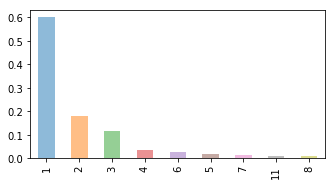

In [33]:
#shows the total number of family size in the train data set of ship
fig = plt.figure(figsize=(18,6))
plt.subplot2grid((2,3), (0,0))
total_family_size = train_data.family_size.value_counts()
print(total_family_size)
train_data.family_size.value_counts(normalize=True).plot(kind='bar', alpha=0.5)

In [34]:
#Feature 3.1: Is the passenger alone in the ship and survived?
for data in all_data:
    data['is_alone'] = 0
    data.loc[data['family_size'] == 1, 'is_alone'] = 1

print(train_data[['is_alone', 'Survived']].groupby(['is_alone'], as_index = False).mean())

   is_alone  Survived
0         0  0.505650
1         1  0.303538


1    537
0    354
Name: is_alone, dtype: int64


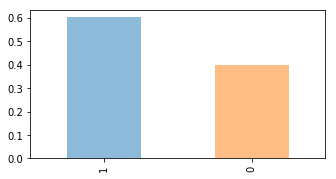

In [28]:
#shows the passenger is alone from the train data set of the ship
fig = plt.figure(figsize=(18,6))
plt.subplot2grid((2,3), (0,0))
is_alone = train_data.is_alone.value_counts()
print(is_alone)
train_data.is_alone.value_counts(normalize=True).plot(kind='bar', alpha=0.5)d

In [33]:
#Feature 4: Embarked shows the start point to begin journey of passengers

for data in all_data:
    print(data['Embarked'].value_counts())
    data['Embarked'] = data['Embarked'].fillna('S') #filling na with most occuring value i.e S

print(train_data[['Embarked','Survived']].groupby(['Embarked'], as_index = False).mean())

S    646
C    168
Q     77
Name: Embarked, dtype: int64
S    270
C    102
Q     46
Name: Embarked, dtype: int64
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


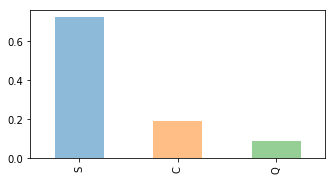

In [36]:
#shows the embarked in a bar graph
fig = plt.figure(figsize=(18,6))
plt.subplot2grid((2,3), (0,0))
train_data.Embarked.value_counts(normalize=True).plot(kind='bar', alpha=0.5)

In [49]:
#Feature 5: Fare
for data in all_data:
    data['Fare'] = data['Fare'].fillna(data['Fare'].median())

train_data['category_fare'] = pd.qcut(train_data['Fare'], 4)
print(train_data[['category_fare','Survived']].groupby(['category_fare'], as_index=False).mean())


     category_fare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


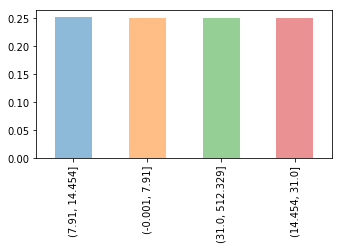

In [52]:
#shows the category_fare in a bar graph
fig = plt.figure(figsize=(18,6))
plt.subplot2grid((2,3), (0,0))
train_data.category_fare.value_counts(normalize=True).plot(kind='bar', alpha=0.5)

In [52]:
#Feature 6: Age

for data in all_data:
    avg_age = data['Age'].mean()
    age_std = data['Age'].std()
    age_null = data['Age'].isnull().sum()
    
    random_list_age = np.random.randint(avg_age - age_std, avg_age + age_std, size = age_null)
    data['Age'][np.isnan(data['Age'])] = random_list_age
    data['Age'] = data['Age'].astype(int)
    
train_data['category_age'] = pd.qcut(train_data['Age'], 5)
print(train_data[['category_age','Survived']].groupby(['category_age'], as_index = False).mean())

     category_age  Survived
0  (-0.001, 19.0]  0.455497
1    (19.0, 25.0]  0.331361
2    (25.0, 32.0]  0.358974
3    (32.0, 40.0]  0.396552
4    (40.0, 80.0]  0.370370


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [50]:
# Feature 7: Name

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

for data in all_data:
    data['title'] = data['Name'].apply(get_title)

for data in all_data:
    data['title'] = data['title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    data['title'] = data['title'].replace('Mlle', 'Miss')
    data['title'] = data['title'].replace('Ms', 'Miss')
    data['title'] = data['title'].replace('Mme', 'Mrs')

print(pd.crosstab(train_data['title'], train_data['Sex']))
print('xxxxxxxxxxxxxxxxxxxxxxxxxxxx')
print(train_data[['title', 'Survived']].groupby(['title'], as_index = False).mean())

Sex     female  male
title               
Master       0    40
Miss       185     0
Mr           0   517
Mrs        126     0
Rare         3    20
xxxxxxxxxxxxxxxxxxxxxxxxxxxx
    title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


In [62]:
# Map data

for data in all_data:
    
    
    # Mapping sex
    
    data['Sex'] = data['Sex'].fillna(0)
    sex_map = { 'female':1 , 'male':2 }
    data['Sex'] = data['Sex'].map(sex_map).astype(int)
    
    
    
    # Mapping title
    data['title'] = data['title'].fillna(0)
    title_map = {'Mr' : 1, 'Miss' : 2, 'Mrs' : 3, 'Master' : 4, 'Rare' : 5}
    data['title'] = data['title'].map(title_map).astype(int)
    
    
    
    # Mapping embarked
    data['Embarked'] = data['Embarked'].fillna(0)
    embark_map = {'S':1, 'C':2, 'Q':3}
    data['Embarked'] = data['Embarked'].map(embark_map).astype(int)
    
    
    # Mapping Fare
    data.loc[data['Fare'] <= 7.91, 'Fare'] = 0
    data.loc[(data['Fare'] > 7.91 & data['Fare'] <= 14.454), 'Fare' ] = 1
    data.loc[(data['Fare'] > 14.454 & data['Fare'] <= 31), 'Fare'] = 2
    data.loc[data['Fare'] > 31, 'Fare'] = 3
    data['Fare'] = data['Fare'].astype(int)
    
    
    # Mapping Age
    data.loc[data['Age'] <= 16, 'Age'] = 0
    data.loc[(data['Age'] > 16 & data['Age'] <= 32), 'Age'] = 1
    data.loc[(data['Age'] > 32 & data['Age'] <= 48), 'Age'] = 2
    data.loc[(data['Age'] > 48 & data['Age'] <= 64), 'Age'] = 3
    data.loc[data['Age'] > 64, 'Age'] = 4
    data['Age'] = data['Age'].astype(int)
    
    
# Feature Selection
# Create a list of columns to drop
drop_elements = ["Name", "Ticket", "Cabin", "SibSp", "Parch", "family_size"]


# Drop columns from both data sets
train_data = train_data.drop(drop_elements, axis = 1)
train_data = train_data.drop(["PassengerId", "category_fare", "category_age"], axis = 1)
test_data = test_data.drop(drop_elements, axis = 1)


# Print ready to use data for predictions
print(train_data.head(10))


    

ValueError: Cannot convert non-finite values (NA or inf) to integer